In [1]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from squlearn.feature_map.qcnn_feature_map import prototype_routine

from squlearn.util import Executor

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

import numpy as np
import itertools
import random

from squlearn.expectation_operator import SingleAmplitude
from squlearn.qnn import QNN
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap
from qiskit.primitives import Estimator

from squlearn.qnn.training import regression
from squlearn.optimizers import SLSQP

from squlearn.qnn.loss import SquaredLoss
from squlearn.qnn.qnnr import QNNRegressor

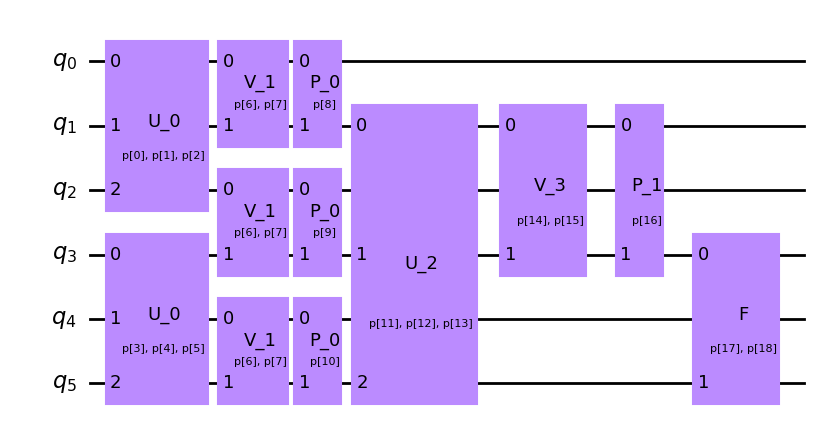

In [4]:
# feature map zum Trainieren (mit anderen Parametern pro Gate):
qcnn_train = qcnn_feature_map(6)

x = ParameterVector("x", 3)
gate_qc = QuantumCircuit(3)
gate_qc.crx(x[0],0,1)
gate_qc.crx(x[2],0,2)
gate_qc.crx(x[1],1,2)

y = ParameterVector("y", 2)
gate_conv2 = QuantumCircuit(2)
gate_conv2.crz(y[0],0,1)
gate_conv2.crz(y[1],1,0)

pooling_gate1 = QuantumCircuit(2)
pooling_gate1.cx(0,1)

z = ParameterVector("z",1)
pooling_gate2 = QuantumCircuit(2)
pooling_gate2.cry(z[0],0,1)

# Fully für 2 Qubits
a = ParameterVector("a",2)
fully_gate = QuantumCircuit(2)
fully_gate.crx(a[0],0,1)
fully_gate.crx(a[1],1,0)

#Fully für 3 Qubits
b = ParameterVector("b",3)
fully_gate2 = QuantumCircuit(3)
fully_gate2.rx(b[0],0)
fully_gate2.rx(b[1],2)
fully_gate2.rx(b[2],1)

qcnn_train.convolution(gate_qc, entangled=False,operator="U",var_param = True)
qcnn_train.convolution(gate_conv2, entangled=False,operator="V",var_param = False)

qcnn_train.pooling(pooling_gate2,operator="P",var_param=True)

qcnn_train.convolution(gate_qc, entangled=False,operator="U",var_param = True)
qcnn_train.convolution(gate_conv2, entangled=False,operator="V",var_param = False)

qcnn_train.pooling(pooling_gate2,operator="P",var_param=True)
qcnn_train.fully_connected(fully_gate)
#print(qcnn_train.get_qubits_left())
param_vec_for_qcnn = ParameterVector("p", qcnn_train.num_parameters)
qcnn_train.get_circuit([],param_vec_for_qcnn).draw()